<div class="alert alert-info">

<b>Добрый день, Данила!👋</b>

Меня зовут Артём, я буду проверять твой проект. У нас, в Практикуме, принято обращение на "ты"😏, но если тебе комфортнее обращаться на Вы, напиши об этом, пожалуйста. Я буду рад перейти на "Вы". 

Я здесь для того, чтобы помочь тебе с учёбой. Вместе мы сможем оптимизировать твой код и найти лучший подход к решению задач!
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Будет здорово, если ты будешь отвечать на мои комментарии своими, выделяя их цветами или так, как тебе понравится, но так, чтобы их можно было отличить от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Если в решении будут какие-то неточности, в первый раз я только укажу на их наличие и дам тебе возможность самостоятельно найти и исправить их. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

Мы все очень ценим время и усилия друг друга, поэтому я постараюсь давать максимально эффективные комментарии и заботливо подойти к твоей работе.
</div>

<div class="alert alert-info">
<b> Комментарий студента.</b>

Большое спасибо за проверку моей работы и рекомендации!
</div>

# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

<font color='yellow'>перезапустить ячейку ниже перед выполнением 3 этапа</font>

In [2]:
import pandas as pd
import numpy as np
import boto3
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise import NormalPredictor
import matplotlib.pyplot as plt
import joblib
import scipy
import sklearn.preprocessing
import sys
import os

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
tracks = pd.read_parquet('tracks.parquet')
catalog_names = pd.read_parquet('catalog_names.parquet')
interactions = pd.read_parquet('interactions.parquet')

<div class="alert alert-success">

<b>Отлично!👍:</b>  Данные загружены, можно переходить к обзору!
</div>

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
tracks.head(10)

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]
5,139,"[12, 214, 2490809]",[84],[11]
6,140,"[12, 214, 2490809]",[84],[11]
7,141,"[12, 214, 60093, 2490809, 10023160, 15635235, ...",[84],[11]
8,143,"[12, 214, 2490809]",[84],[11]
9,144,"[13, 99422]",[90],"[59, 102]"


In [5]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [6]:
tracks_len = tracks.copy()
tracks_len['albums'] = tracks_len['albums'].apply(lambda x: len(x))
tracks_len['artists'] = tracks_len['artists'].apply(lambda x: len(x))
tracks_len['genres'] = tracks_len['genres'].apply(lambda x: len(x))
tracks_len

,track_id,albums,artists,genres
0,26,2,1,2
1,38,2,1,2
2,135,3,1,1
3,136,3,1,1
4,138,10,1,1
...,...,...,...,...
999995,101478482,1,1,2
999996,101490148,1,1,2
999997,101493057,1,1,2
999998,101495927,1,1,2


<div class="alert alert-success">

<b>Отлично!👍:</b>  Хорошо, можем теперь посмотреть количество альбомов, артистов и жанров для трека
</div>

In [7]:
tracks_len[tracks_len['albums'] == 0]

,track_id,albums,artists,genres
310821,20200372,0,0,0
310826,20200380,0,0,0
312469,20305116,0,0,0
312474,20305121,0,0,0
320353,20756854,0,0,0
326588,21196099,0,0,0
326592,21196103,0,0,0
326594,21196105,0,0,0
326596,21196107,0,0,0
326598,21196109,0,0,0


In [8]:
tracks_len[tracks_len['artists'] == 0]

,track_id,albums,artists,genres
146031,3599314,1,0,2
146163,3599591,1,0,2
177544,4790215,1,0,2
218922,10063296,1,0,2
231455,12122918,1,0,1
...,...,...,...,...
999868,101201589,1,0,2
999876,101219571,1,0,3
999901,101243616,1,0,2
999920,101292599,1,0,4


In [9]:
tracks_len[tracks_len['genres'] == 0]

,track_id,albums,artists,genres
490,2520,9,1,0
3069,16776,52,1,0
3077,16801,74,1,0
4192,23752,10,1,0
6645,38012,7,1,0
...,...,...,...,...
997667,99412992,1,1,0
999192,100497082,1,1,0
999703,100923319,1,1,0
999704,100923322,1,1,0


In [10]:
empty_indexes = list(set(
    tracks_len[tracks_len['albums'] == 0].index.values.tolist() + 
    tracks_len[tracks_len['artists'] == 0].index.values.tolist() + 
    tracks_len[tracks_len['genres'] == 0].index.values.tolist()))

In [11]:
tracks.drop(empty_indexes, inplace=True)

<div class="alert alert-warning">
   
<b>Рекомендации💡:</b> Получается, если у трека нет жанра ИЛИ альбома ИЛИ артиста, то такой трек мы убираем из датасета. В целом, это может быть валидно, если добавишь какую-нибудь аргументацию или комментарий. Потому что вообще это момент спорный. Может быть такое, что у трека просто нет жанра и это не страшно.
 <br/>   Также, если ты удаляешь какие-то данные, то всегда добавляй отслеживание сколько данных было, сколько данных стало, чтобы было ясно на сколько критична такая очистка данных.
</div>

In [12]:
len(empty_indexes)

19023

<div class="alert alert-info">
В Наборе данных только 19023 трека без указания автора, альбома или жанра. Учитывая, что в наборе данных 1000000 треков, это совсем не большое количество.
</div>

In [13]:
catalog_names.head()

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [14]:
catalog_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [15]:
catalog_names.isnull().value_counts()

id     type   name 
False  False  False    1812471
Name: count, dtype: int64

In [16]:
catalog_names['type'].value_counts()

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

<div class="alert alert-info">
<b> Исправил заполнение идентификаторов. Теперь для этого используется одна функция.</b>
</div>

In [17]:
def fill_id(row, type):
    return int(row['id']) if row['type'] == type else None

catalog_names['track_id'] = catalog_names.apply(lambda row: fill_id(row, 'track'), axis=1)
catalog_names['album_id'] = catalog_names.apply(lambda row: fill_id(row, 'album'), axis=1)
catalog_names['artist_id'] = catalog_names.apply(lambda row: fill_id(row, 'artist'), axis=1)
catalog_names['genre_id'] = catalog_names.apply(lambda row: fill_id(row, 'genre'), axis=1)
catalog_names

,id,type,name,track_id,album_id,artist_id,genre_id
0,3,album,Taller Children,NaN,3.0,NaN,NaN
1,12,album,Wild Young Hearts,NaN,12.0,NaN,NaN
2,13,album,Lonesome Crow,NaN,13.0,NaN,NaN
3,17,album,Graffiti Soul,NaN,17.0,NaN,NaN
4,26,album,Blues Six Pack,NaN,26.0,NaN,NaN
...,...,...,...,...,...,...,...
1812466,101478482,track,На лицо,101478482.0,NaN,NaN,NaN
1812467,101490148,track,Без капли мысли,101490148.0,NaN,NaN,NaN
1812468,101493057,track,SKITTLES,101493057.0,NaN,NaN,NaN
1812469,101495927,track,Москва,101495927.0,NaN,NaN,NaN



<div class="alert alert-warning">
   
<b>Рекомендации💡:</b> Значит, ты хочешь проставить отдельно ещё раз айдишки для каждого типа. Вообще, тут достаточно одной функции. Помни про правило хорошего кода DRY: "Don't Repeat Yourself"

Все 4 функции в целом можно заменить одной:

```def fill_id(row, type):
    return int(row['id']) if row['type'] == type else None```
    
</div>

In [18]:
interactions.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [19]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [20]:
interactions.isnull().value_counts()

user_id  track_id  track_seq  started_at
False    False     False      False         222629898
Name: count, dtype: int64

In [21]:
interactions = interactions.query('track_seq < 1000')

In [22]:
interactions

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22
...,...,...,...,...
287,1374582,95514767,288,2022-12-29
288,1374582,97220301,289,2022-12-29
289,1374582,97241171,290,2022-12-29
290,1374582,98542641,291,2022-12-29


In [23]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980977 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   track_id  980977 non-null  int64 
 1   albums    980977 non-null  object
 2   artists   980977 non-null  object
 3   genres    980977 non-null  object
dtypes: int64(1), object(3)
memory usage: 37.4+ MB


In [24]:
track_id = pd.DataFrame(interactions['track_id'].unique(), columns=['track_id'])
tracks = tracks.merge(track_id, on=['track_id'], how='inner')
interactions = interactions.merge(track_id, on=['track_id'], how='inner')
track_id = pd.DataFrame(tracks['track_id'].unique(), columns=['track_id'])
tracks = tracks.merge(track_id, on=['track_id'], how='inner')
interactions = interactions.merge(track_id, on=['track_id'], how='inner')

In [25]:
len(interactions['track_id'].unique())

980193

In [26]:
len(tracks['track_id'].unique())

980193

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

В таблице tracks были найдены песни у которых отсутствовал один или несколько признаков. Все эти песни были удалены.

В таблице catalog_names были добавлены столбцы с индексами для каждого типа значений в этой таблице: track, album, artist, genre.

В таблице interactions были удалены все взаимодействия пользователей после тысячного прослушенного трека, чтобы сократить размер таблицы. Данные о треках с которыми теперь нет взаимодействий были удалены из таблицы tracks.

<div class="alert alert-success">

<b>Отлично!👍:</b>  Молодец, что расписал выводы по результатам этапа.
</div>

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [27]:
a = interactions.groupby(['track_id']).count()
a.drop(columns=['track_seq', 'started_at'], inplace=True)
a['track_id'] = a.index
a.rename(columns={'user_id': 'listening_count'}, inplace=True)
tracks = tracks.merge(a['listening_count'], on='track_id', how='left')

In [28]:
tracks['listening_count'].describe()

count    980193.000000
mean        199.402645
std        1306.776756
min           1.000000
25%           7.000000
50%          15.000000
75%          54.000000
max      111062.000000
Name: listening_count, dtype: float64

Наиболее популярные треки

In [29]:
top_100_listening = tracks.sort_values(by='listening_count', ascending=False).iloc[:100]

In [39]:
catalog_names.merge(top_100_listening, on=['track_id']).sort_values(by='listening_count', ascending=False).head(10)

,id,type,name,track_id,album_id,artist_id,genre_id,albums,artists,genres,listening_count
4,53404,track,Smells Like Teen Spirit,53404.0,NaN,NaN,NaN,"[4367, 89708, 294911, 294912, 294914, 297393, ...",[9262],"[13, 14, 102]",111062
48,33311009,track,Believer,33311009.0,NaN,NaN,NaN,"[4440454, 4456609, 4482682, 4882996, 5072976, ...",[675068],"[14, 102]",102752
8,178529,track,Numb,178529.0,NaN,NaN,NaN,"[18113, 21924, 21940, 488052, 10009799]",[36800],"[41, 47]",101913
52,35505245,track,I Got Love,35505245.0,NaN,NaN,NaN,"[4431303, 20559909]","[4611844, 588511]","[3, 75]",97415
21,795836,track,Shape Of My Heart,795836.0,NaN,NaN,NaN,"[88770, 296297, 297576, 302579, 303469, 558376...",[680],"[11, 14, 102]",84540
40,24692821,track,Way Down We Go,24692821.0,NaN,NaN,NaN,"[2888516, 3523463, 3530199, 4333848, 4420934, ...",[1194096],[70],83804
46,32947997,track,Shape of You,32947997.0,NaN,NaN,NaN,"[4019560, 4172930, 4172931, 5614201, 5933975]",[381067],[11],82874
86,65851540,track,Юность,65851540.0,NaN,NaN,NaN,[10692414],[1554548],"[11, 20]",81891
64,45499814,track,Life,45499814.0,NaN,NaN,NaN,"[6109461, 7094821, 7152451, 7170954, 7285586, ...",[5007577],"[11, 20]",81396
30,6705392,track,Seven Nation Army,6705392.0,NaN,NaN,NaN,"[720505, 949761, 2118709, 4501364, 6681581, 11...",[36963],[13],81063


Наиболее популярные жанры

In [31]:
top_genres = {}
for i in range(100):
    for genre in list(top_100_listening.iloc[i]['genres']):
        if genre not in top_genres.keys():
            top_genres[genre] = 1
        else: 
            top_genres[genre] += 1

top_5_genres = []
for genre in sorted(top_genres, key=top_genres.get, reverse=True):
    top_5_genres.append(genre)
top_5_genres = top_5_genres[: 5]
top_5_genres

[11, 102, 20, 14, 75]

In [32]:
for i in range(5):
    genre = catalog_names['name'][catalog_names['genre_id'] == top_5_genres[i]].values
    print(f'id: {top_5_genres[i]} \nGenre: {genre} \n')

id: 11 
Genre: ['pop'] 

id: 102 
Genre: ['allrock'] 

id: 20 
Genre: ['ruspop'] 

id: 14 
Genre: ['rock'] 

id: 75 
Genre: ['rap'] 



Треки, которые никто не прослушал

Данных о таких треках не осталось, так как они были удалены из-за отсутствия информации о альбоме, исполнителе или жанре.

<div class="alert alert-info">
<b> Проверка на наличие дубликатов.</b>
</div>

In [33]:
tracks["track_id"].duplicated().value_counts()

track_id
False    980193
Name: count, dtype: int64

<div class="alert alert-info">
<b> Проверка на наличие аномально больших данных.</b>
</div>

In [34]:
tracks_len.describe()

,track_id,albums,artists,genres
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,3.685121e+07,3.128808,1.264212,1.652658
std,2.679771e+07,29.716680,0.682704,0.572486
min,2.600000e+01,0.000000,0.000000,0.000000
25%,1.543088e+07,1.000000,1.000000,1.000000
50%,3.455047e+07,1.000000,1.000000,2.000000
75%,5.692557e+07,2.000000,1.000000,2.000000
max,1.015218e+08,2844.000000,26.000000,10.000000


In [40]:
tracks_len[tracks_len['artists'] == 26]

,track_id,albums,artists,genres
461740,32192493,1,26,2
616552,42952658,1,26,2


In [41]:
catalog_names[catalog_names['track_id'] == 32192493]

,id,type,name,track_id,album_id,artist_id,genre_id
1274211,32192493,track,#ЖИТЬ,32192493.0,NaN,NaN,NaN


In [42]:
catalog_names[catalog_names['track_id'] == 42952658]

,id,type,name,track_id,album_id,artist_id,genre_id
1429023,42952658,track,#Жить,42952658.0,NaN,NaN,NaN


<div class="alert alert-info">
<b> Комментарий студента.</b>

В датасете есть треки у которых указано много артистов или жанров, а так же треки которые входят в большое количество альбомов. Но всё это не повлияет на дальнейшую работу, так как информация о альбомах и артистах не учитывается при обучений моделей, а из списка жанров для каждого отдельного трека берется только первы жанр, как основной.
</div>

<div class="alert alert-info">
<b> Можно визуализировать количество взаимодействий пользователей с треками в месяц.</b>
</div>

In [35]:
interactions["month"] = interactions["started_at"].dt.month

In [36]:
interactions.groupby('month')['track_id'].count().values.tolist()

[2406020,
 4404945,
 7199023,
 9378639,
 12401853,
 14670221,
 17979961,
 21033801,
 23434000,
 27316099,
 28899345,
 26329170]

<BarContainer object of 12 artists>

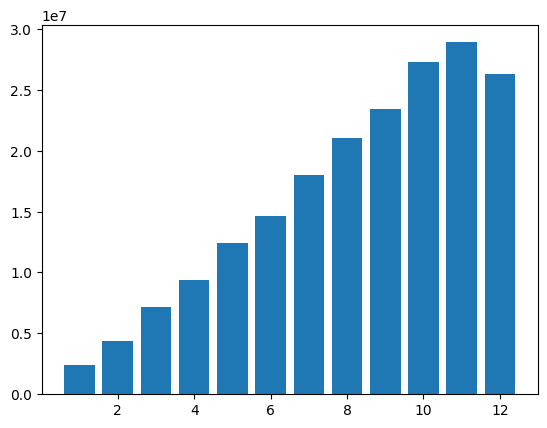

In [37]:
x = [i for i in range(1, 13)]
y = interactions.groupby('month')['track_id'].count().values.tolist()
plt.bar(x, y)

<div class="alert alert-block alert-danger">
<b>На доработку🤔:</b>
 Чего сейчас не хватает:
    <br/> 1) Не увидел обработку дублей. Нужно хотя бы посмотреть есть ли в данных дубли и дальше принимать решение убирать их или нет.
    <br/> 2) Здорово, что ты посмотрел пустые данные. Теперь нужно ещё посмотреть нет ли у нас аномально больших данных. Например, трек у которого сотни жанров или артистов.
    <br/> 3) Будет очень здорово, если ты добавишь пару графиков для наглядности. В тех моментах, которые посчитаешь нужным визуализировать. 
    <br/> 4) И обязательно надо добавить выводы по EDA.
</div>

<div class="alert alert-info">
<b> Выводы по EDA.</b>

- Большинство треков имеет небольшое количество прослушиваний. Скорее всего почти всепрослушивания распредлены по нескольким тысячам наиболее популярных треков. 
- Наиболее популярные жанры: поп, рок, рэп.
- В таблице с треками нет дубликатов по id, но есть одинаковые треки, для обнаружения которых нужно сравнивать их названия по таблице catalog_names. Например трек #ЖИТЬ, который дважды внесен в таблицу, но под разными названиями: #ЖИТЬ и #Жить.
- Аномально большие данные в табице tracks есть, но они не влияют на обучение моделей.
- Взаимодействия пользователей с треками увеличиваются с каждым месяцем. Я думаю это связано с тем что каждая пара пользователь-трек скорее всего отображает последнее взаимодействие, а значит такой рост связан с тем что пользователи переслушивают треки, которые им нравятся.
</div>

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [32]:
items = tracks.copy()
events = interactions.copy()
items.to_parquet("items.par")
events.to_parquet("events.par")

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [40]:
bucket_name = os.environ.get("S3_BUCKET_NAME")
aws_access_id = os.environ.get("AWS_ACCESS_KEY_ID")
aws_secret_key = os.environ.get("AWS_SECRET_ACCESS_KEY")

client = boto3.client('s3',
    aws_access_key_id=aws_access_id,
    aws_secret_access_key=aws_secret_key,
    endpoint_url='https://storage.yandexcloud.net'
    )

client.upload_file('items.par',
    bucket_name,
    'recsys/data/items.parquet'
    )

client.upload_file('events.par',
    bucket_name,
    'recsys/data/events.parquet'
    )

<div class="alert alert-success">

<b>Отлично!👍:</b>  Хорошо, всё сохранили :)
</div>

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

Необходимо переапустить kernel, выполнить ячейку под желтым комментарием и продолжить с этапа 3.

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [2]:
items = pd.read_parquet('items.par')
events = pd.read_parquet('events.par')

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [3]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

<div class="alert alert-success">

<b>Отлично!👍:</b>  Подходит)
    Выборки train / test можно получать несколькими способами (см. картинку ниже)

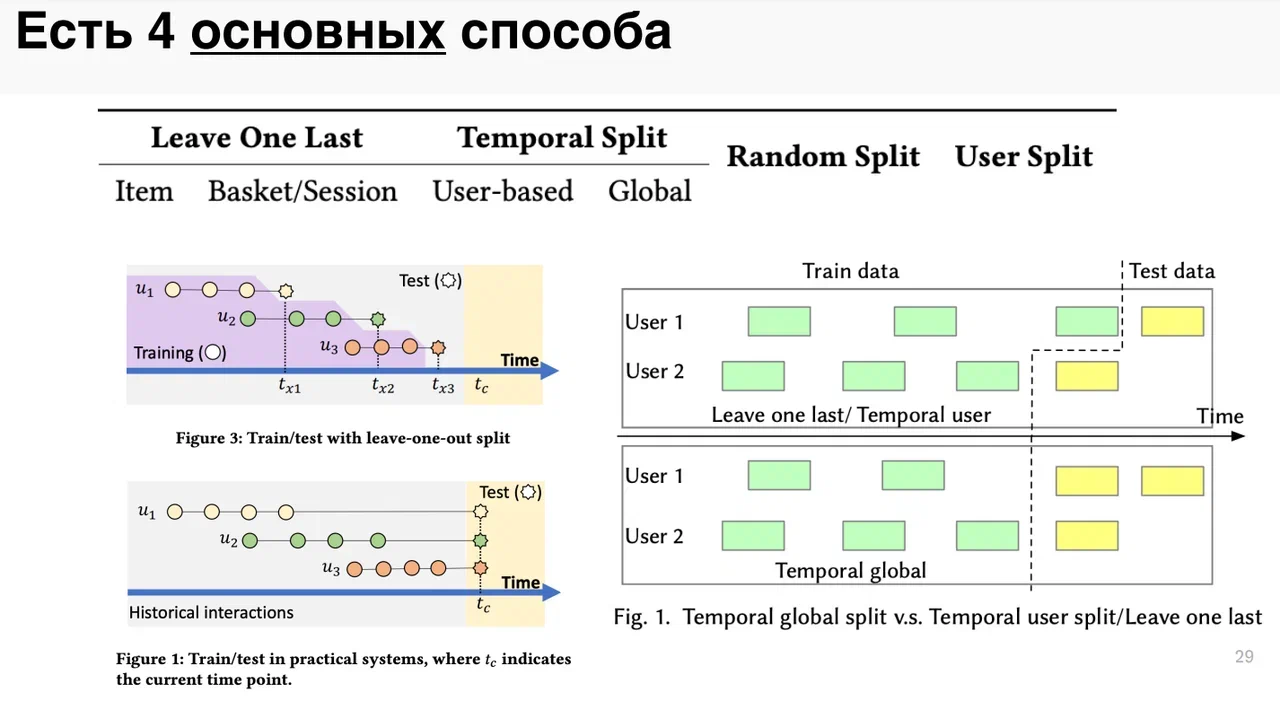

In [ ]:
# количество треков в train и test
tracks_train = pd.DataFrame(data=events_train["track_id"].drop_duplicates(), columns=["track_id"])
tracks_train = tracks_train.merge(items, on=['track_id'], how='left')
tracks_test = pd.DataFrame(data=events_test["track_id"].drop_duplicates(), columns=["track_id"])
tracks_test = tracks_test.merge(items, on=['track_id'], how='left')
# количество треков, которые есть и в train, и в test
common_tracks = 0
for i in tracks_test['track_id'].values:
    if i in tracks_train['track_id'].values:
        common_tracks += 1

print(len(tracks_train), len(tracks_test), common_tracks)

977964 561707 559478


<div class="alert alert-success">

<b>Отлично!👍:</b>  Здорово, что не забыл про дубли! Я бы рекомендовал проработать этот момент пораньше. Кстати, проверь, а может ли быть такое, что у нас есть, например, один и тот же трек, но с разными жанрами. Будет ли это считаться дублями?)
</div>

# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [7]:
top_popular = catalog_names.merge(tracks_train, on=['track_id']).sort_values(by='listening_count', ascending=False).head(100)[['track_id', 'name', 'listening_count']]
top_popular.head(10)

,track_id,name,listening_count
9092,53404.0,Smells Like Teen Spirit,111062
481638,33311009.0,Believer,102752
26638,178529.0,Numb,101913
509799,35505245.0,I Got Love,97415
90174,795836.0,Shape Of My Heart,84540
366338,24692821.0,Way Down We Go,83804
473079,32947997.0,Shape of You,82874
817168,65851540.0,Юность,81891
644160,45499814.0,Life,81396
196522,6705392.0,Seven Nation Army,81063


<div class="alert alert-success">

<b>Отлично!👍:</b>  Выглядит логично)
</div>

In [8]:
top_popular.to_parquet("top_popular.parquet")

# Персональные

Рассчитаем персональные рекомендации.

In [7]:
sparsity = (1 - len(events)/(events['user_id'].nunique() * events['track_id'].nunique())) * 100
print("sparsity =",sparsity,"%")

sparsity = 99.98547439986586 %


In [5]:
# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(events["track_id"].unique())
items["track_id_enc"] = item_encoder.transform(items["track_id"])
events_train["track_id_enc"] = item_encoder.transform(events_train["track_id"])
events_test["track_id_enc"] = item_encoder.transform(events_test["track_id"])

/tmp/ipykernel_1944/239103732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_1944/239103732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_1944/239103732.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [6]:
joblib.dump(user_encoder, 'user_encoder.joblib')
joblib.dump(item_encoder, 'item_encoder.joblib')

['item_encoder.joblib']

In [6]:
user_encoder = joblib.load('user_encoder.joblib')
item_encoder = joblib.load('item_encoder.joblib')

In [7]:
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

items["track_id_enc"] = item_encoder.transform(items["track_id"])
events_train["track_id_enc"] = item_encoder.transform(events_train["track_id"])
events_test["track_id_enc"] = item_encoder.transform(events_test["track_id"])

/tmp/ipykernel_2627/886513858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_2627/886513858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_2627/886513858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [8]:
events_train['rating'] = 1
events_test['rating'] = 1

/tmp/ipykernel_2627/3717546770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train['rating'] = 1
/tmp/ipykernel_2627/3717546770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test['rating'] = 1


In [10]:
# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["rating"],
    (events_train['user_id_enc'], events_train['track_id_enc'])),
    dtype=np.int8)

In [ ]:
#  размер sparse-матрицы формата CSR  в гигабайтах
sum([sys.getsizeof(i) for i in user_item_matrix_train.data])/1024**3

4.275934933684766

In [9]:
# создание и тренировка модели
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

/home/mle-user/sprints/mle-project-sprint-4-v001/env_sprint4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mle-user/sprints/mle-project-sprint-4-v001/env_sprint4/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [34:27<00:00, 41.34s/it]


In [10]:
joblib.dump(als_model, 'als_model.joblib')

['als_model.joblib']

In [4]:
als_model = joblib.load('als_model.joblib')

/home/mle-user/sprints/mle-project-sprint-4-v001/env_sprint4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))


In [ ]:
# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=100)

In [14]:
import pickle
with open('als_recommendations.pkl', 'wb') as file:
    pickle.dump(als_recommendations, file)

In [4]:
import pickle
with open('als_recommendations.pkl', 'rb') as f:
    als_recommendations = pickle.load(f)

In [5]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]


In [6]:
als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "track_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})

In [7]:
als_recommendations = als_recommendations.explode(["track_id_enc", "score"], ignore_index=True)

In [8]:
# приводим типы данных
als_recommendations["track_id_enc"] = als_recommendations["track_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")


In [9]:
# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["track_id"] = item_encoder.inverse_transform(als_recommendations["track_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "track_id_enc"])

In [10]:
als_recommendations = als_recommendations[["user_id", "track_id", "score"]]
als_recommendations.to_parquet("personal_als.parquet")

<div class="alert alert-success">

<b>Отлично!👍:</b>  Персональные рекомендации сформированы!
</div>

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [9]:
# получим энкодированные идентификаторы всех объектов, известных нам из events_train
train_item_ids_enc = events_train['track_id_enc'].unique()

max_similar_items = 10

# получаем списки похожих объектов, используя ранее полученную ALS-модель
# метод similar_items возвращает и сам объект, как наиболее похожий
# этот объект мы позже отфильтруем, но сейчас запросим на 1 больше
similar_items = als_model.similar_items(train_item_ids_enc, N=max_similar_items+1)

# преобразуем полученные списки в табличный формат
sim_item_item_ids_enc = similar_items[0]
sim_item_scores = similar_items[1]

similar_items = pd.DataFrame({
    "track_id_enc": train_item_ids_enc,
    "sim_track_id_enc": sim_item_item_ids_enc.tolist(), 
    "score": sim_item_scores.tolist()})
similar_items = similar_items.explode(["sim_track_id_enc", "score"], ignore_index=True)

# приводим типы данных
similar_items["sim_track_id_enc"] = similar_items["sim_track_id_enc"].astype("int") 
similar_items["score"] = similar_items["score"].astype("float")

# получаем изначальные идентификаторы
similar_items["track_id_1"] = item_encoder.inverse_transform(similar_items["track_id_enc"])
similar_items["track_id_2"] = item_encoder.inverse_transform(similar_items["sim_track_id_enc"])
similar_items = similar_items.drop(columns=["track_id_enc", "sim_track_id_enc"])

# убираем пары с одинаковыми объектами
similar_items = similar_items.query("track_id_1 != track_id_2")

In [10]:
similar_items.to_parquet("similar.parquet")

<div class="alert alert-success">

<b>Отлично!👍:</b>  С похожими тоже всё правильно!
</div>

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [4]:
# загрузим данные
top_popular = pd.read_parquet("top_popular.parquet")
als_recommendations = pd.read_parquet('personal_als.parquet')

In [5]:
events_labels = events_test.copy()
events_labels["target"] = 1

Разделим тестовую выборку для обучения ранжирующей модели. Возьмём для этого дату 31-12-2022.

In [6]:
train_test_global_time_split_date = pd.to_datetime("2022-12-31")

train_test_global_time_split_idx = events_labels["started_at"] < train_test_global_time_split_date
events_labels_rank = events_labels[~train_test_global_time_split_idx]
events_labels_train = events_labels[train_test_global_time_split_idx]

<div class="alert alert-warning">
   
<b>Рекомендации💡:</b> 
Для обучения ранжирующей модели стоит использовать дополнительную отложенную выборку по времени. Схема обучения двухстадийных рекомендаций приведена ниже:
</div>


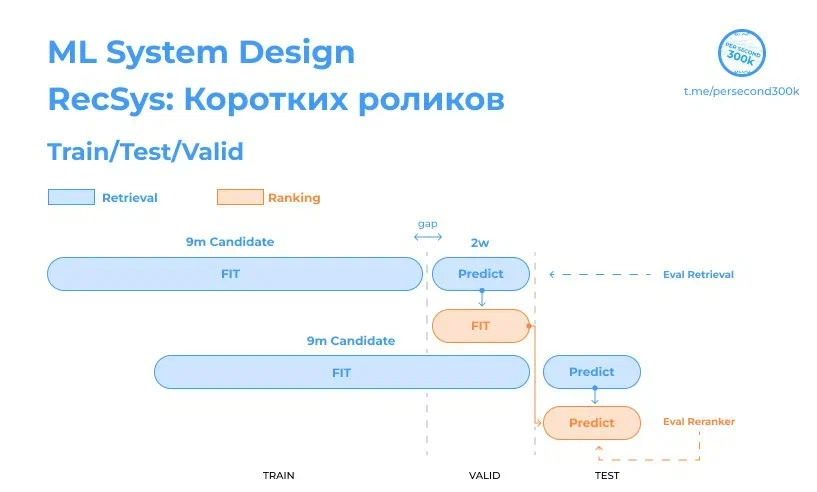

#### Train

In [7]:
candidates_train = als_recommendations.merge(events_labels_train[["user_id", "track_id", 'started_at', "target"]], on=["user_id", "track_id"], how="left")
candidates_train["target"] = candidates_train["target"].fillna(0).astype("int")

In [8]:
candidates_to_sample_train = candidates_train.groupby("user_id").filter(lambda x: x["target"].sum() > 0)

In [9]:
# для каждого пользователя оставляем 5 негативных примеров
negatives_per_user = 5
candidates_for_train = pd.concat([
    candidates_to_sample_train.query("target == 1"),
    candidates_to_sample_train.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0))
    ])

In [10]:
candidates_for_train = candidates_for_train.merge(top_popular[['track_id', 'name', 'listening_count']],on='track_id')

In [7]:
def genre_for_track(track_id):
    return items[items['track_id'] == track_id][['genres']].values[0][0][0]

In [12]:
candidates_for_train['genre'] = candidates_for_train['track_id'].apply(genre_for_track)

In [8]:
items['genre'] = items['genres'].apply(lambda x: x[0])

In [9]:
popularity_of_the_genre = events_train.merge(
                items[["track_id", "genre"]], 
                on=["track_id"], 
                how="left",
                ).groupby("genre")["track_id"].count()
popularity_of_the_genre /= popularity_of_the_genre.sum()
popularity_of_the_genre = popularity_of_the_genre.reset_index().rename(columns={"track_id": "popularity_of_the_genre"})
popularity_of_the_genre.sort_values(by="popularity_of_the_genre", ascending=False)

,genre,popularity_of_the_genre
10,11,2.546879e-01
2,3,1.123239e-01
52,68,8.203323e-02
15,16,6.720949e-02
1,2,5.901262e-02
...,...,...
61,106,2.341410e-07
70,146,1.687993e-07
68,124,1.579091e-07
71,163,1.143479e-07


In [15]:
candidates_for_train = candidates_for_train.merge(
    popularity_of_the_genre,
    on="genre",
    how="left"
)

candidates_for_train.head()

,user_id,track_id,score,started_at,target,name,listening_count,genre,popularity_of_the_genre
0,10,45499814,0.129061,2022-12-20,1,Life,81396,11,0.254688
1,3263,45499814,0.077301,2022-12-17,1,Life,81396,11,0.254688
2,4414,45499814,0.102092,2022-12-18,1,Life,81396,11,0.254688
3,4543,45499814,0.103995,2022-12-18,1,Life,81396,11,0.254688
4,4551,45499814,0.110499,2022-12-16,1,Life,81396,11,0.254688


In [16]:
candidates_for_train.to_parquet('candidates_for_train.parquet')

#### Test

In [10]:
candidates_rank = als_recommendations.merge(events_labels_rank[["user_id", "track_id", 'started_at', "target"]], on=["user_id", "track_id"], how="left")
candidates_rank["target"] = candidates_rank["target"].fillna(0).astype("int")

In [11]:
candidates_to_sample_rank = candidates_rank.groupby("user_id").filter(lambda x: x["target"].sum() > 0)

In [12]:
negatives_per_user = 5
candidates_to_rank = pd.concat([
    candidates_to_sample_rank.query("target == 1"),
    candidates_to_sample_rank.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0))
    ])

In [13]:
candidates_to_rank = candidates_to_rank.merge(top_popular[['track_id', 'name', 'listening_count']],on='track_id')

In [14]:
candidates_to_rank['genre'] = candidates_to_rank['track_id'].apply(genre_for_track)

In [15]:
candidates_to_rank = candidates_to_rank.merge(
    popularity_of_the_genre,
    on="genre",
    how="left"
)

candidates_to_rank.head()

,user_id,track_id,score,started_at,target,name,listening_count,genre,popularity_of_the_genre
0,567,93126179,0.061367,2022-12-31,1,Солнце Монако,53247,11,0.254688
1,12285,93126179,0.125846,2022-12-31,1,Солнце Монако,53247,11,0.254688
2,31083,93126179,0.096502,2022-12-31,1,Солнце Монако,53247,11,0.254688
3,40370,93126179,0.140063,2022-12-31,1,Солнце Монако,53247,11,0.254688
4,50291,93126179,0.050845,2022-12-31,1,Солнце Монако,53247,11,0.254688


In [16]:
candidates_to_rank.to_parquet('candidates_to_rank.parquet')

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [17]:
candidates_for_train = pd.read_parquet('candidates_for_train.parquet')
candidates_to_rank = pd.read_parquet('candidates_to_rank.parquet')

In [18]:
from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['score', 'listening_count', 
    'genre', 'popularity_of_the_genre'] 
target = 'target'

# создаём Pool
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0,
)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6686288	total: 84.6ms	remaining: 1m 24s
100:	learn: 0.5050293	total: 2.71s	remaining: 24.1s
200:	learn: 0.4949795	total: 5.28s	remaining: 21s
300:	learn: 0.4916569	total: 7.87s	remaining: 18.3s
400:	learn: 0.4899772	total: 10.5s	remaining: 15.7s
500:	learn: 0.4890193	total: 13.2s	remaining: 13.1s
600:	learn: 0.4882181	total: 15.9s	remaining: 10.5s
700:	learn: 0.4874374	total: 18.5s	remaining: 7.91s
800:	learn: 0.4867753	total: 21.2s	remaining: 5.28s
900:	learn: 0.4862658	total: 23.9s	remaining: 2.63s
999:	learn: 0.4857936	total: 26.7s	remaining: 0us


<div class="alert alert-success">

<b>Отлично!👍:</b> CatBoostClassifier нам подойдет для ранжирования. Можно для эксперимента попробовать еще CatBoostRanker  
</div>

In [28]:
inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict(inference_data)

candidates_to_rank["cb_score"] = predictions

# для каждого пользователя проставим rank, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_to_rank["rank"] = candidates_to_rank.groupby("user_id").cumcount() + 1

max_recommendations_per_user = 5
final_recommendations = candidates_to_rank.query("rank <= @max_recommendations_per_user")

In [29]:
final_recommendations

,user_id,track_id,score,started_at,target,name,listening_count,genre,popularity_of_the_genre,cb_score,rank
6052,517,43942453,0.146684,NaT,0,NBA,66875,6,0.017179,0,1
0,567,93126179,0.061367,2022-12-31,1,Солнце Монако,53247,11,0.254688,1,1
1343,567,75642961,0.143218,NaT,0,Венера-Юпитер,52543,11,0.254688,1,2
6956,567,39946957,0.096747,NaT,0,Зелёные волны,65968,11,0.254688,0,3
2980,646,33311009,0.104532,NaT,0,Believer,102752,14,0.048135,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2555,1374028,58515506,0.083118,NaT,0,Увезите меня на Дип-хаус,53810,11,0.254688,0,2
2781,1374028,50685843,0.062439,NaT,0,Кукла колдуна,66001,50,0.015649,0,3
6230,1374188,25995209,0.720607,NaT,0,Faded,51792,16,0.067209,0,1
2109,1374377,57799893,0.022172,NaT,0,Roses,50713,16,0.067209,0,1


In [30]:
# количество пользователей попало в final_recommendations
final_recommendations['user_id'].nunique()

4755

In [31]:
# сохранение финальных рекомендаций
final_recommendations.to_parquet("recommendations.parquet")

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [4]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # оставляет только те item_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["track_id"].isin(events_train["track_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "track_id", "gt"]].merge(
        recs_for_common_users[["user_id", "track_id", "score"]], 
        on=["user_id", "track_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [5]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

In [6]:
def compute_coverage(recommendations):
    cov_items = recommendations['track_id'].nunique() / items['track_id'].nunique()
    return cov_items

<div class="alert alert-success">

<b>Отлично!👍:</b> Функции написаны, давай смотреть качество)
</div>

#### Топ популярных

In [22]:
top_popular = pd.read_parquet('top_popular.parquet')

In [23]:
top_popular['top_pop_rating'] = 1
rank_100 = np.arange(1, 101)
top_popular['rank'] = rank_100

Оставим только 10 треков для рекомендаций, чтобы не перегружать машину.

In [24]:
top_popular = top_popular.head(10)

In [25]:
top_popular

,track_id,name,listening_count,top_pop_rating,rank
9092,53404.0,Smells Like Teen Spirit,111062,1,1
481638,33311009.0,Believer,102752,1,2
26638,178529.0,Numb,101913,1,3
509799,35505245.0,I Got Love,97415,1,4
90174,795836.0,Shape Of My Heart,84540,1,5
366338,24692821.0,Way Down We Go,83804,1,6
473079,32947997.0,Shape of You,82874,1,7
817168,65851540.0,Юность,81891,1,8
644160,45499814.0,Life,81396,1,9
196522,6705392.0,Seven Nation Army,81063,1,10


In [10]:
# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

In [11]:
cold_users = []

for i in users_test.values:
    if i not in users_train.values:
        cold_users.append(i)

print(len(cold_users))

30660


In [30]:
events_test['rating'] = 1

/tmp/ipykernel_2693/3030950658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test['rating'] = 1


In [26]:
cold_user_recs = \
    events_test[events_test["user_id"].isin(cold_users)] \
    .merge(top_popular, on="track_id", how="left")

In [27]:
cold_user_recs = cold_user_recs.fillna(0)

In [31]:
all_users_recs = events_test[['track_id','user_id']].merge(top_popular, on="track_id", how="left")
all_users_recs["top_pop_rating"] = all_users_recs["top_pop_rating"].fillna(0)

In [ ]:
# посчитаем метрики рекомендаций
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_top = mean_squared_error(cold_user_recs["rating"], cold_user_recs["top_pop_rating"], squared=False)
mae_top = mean_absolute_error(cold_user_recs["rating"], cold_user_recs["top_pop_rating"])
coverave_top = compute_coverage(top_popular)
novelty_top =  (1-all_users_recs.groupby("user_id")["top_pop_rating"].sum()/10)

print(f'RMSE: {round(rmse_top, 2)}')
print(f'MAE: {round(mae_top, 2)}')
print(f'Coverage: {coverave_top}')
print(f'Novelty: {novelty_top.mean()}')

RMSE: 1.0
MAE: 0.99
Coverage: 1.020207244899729e-05
Novelty: 0.9948650810776672


#### Персональные рекомендации, полученные при помощи ALS

In [7]:
als_recommendations = pd.read_parquet('personal_als.parquet')

In [8]:
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test, 
    als_recommendations, 
    top_k=5
    )

/tmp/ipykernel_3047/2213935890.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


Common users: 760012


Метрику Novelty посчитать не получилось, так как не хватает ресурсов виртуальной машины.

In [9]:
precision_als, recall_als = compute_cls_metrics(events_recs_for_binary_metrics)
coverave_als = compute_coverage(als_recommendations)
print(f'Precision: {precision_als}')
print(f'Recall: {recall_als}')
print(f'Coverage: {coverave_als}')

Precision: 0.0057783298158450135
Recall: 0.005163329934174448
Coverage: 0.007893343453789203


#### Итоговые рекомендации

In [10]:
recommendations = pd.read_parquet('recommendations.parquet')

In [11]:
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test, 
    recommendations, 
    top_k=5
    )

/tmp/ipykernel_3047/2213935890.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


Common users: 4755


In [17]:
precision_final, recall_final = compute_cls_metrics(events_recs_for_binary_metrics)
coverave_final = compute_coverage(als_recommendations)
novelty_final = (1-recommendations.query("rank <= 5").groupby("user_id")["target"].mean()).mean()
print(f'Precision: {precision_final}')
print(f'Recall: {recall_final}')
print(f'Coverage: {coverave_final}')
print(f'Novelty: {novelty_final}')

Precision: 0.17051524710830704
Recall: 0.1298710708711453
Coverage: 0.007893343453789203
Novelty: 0.8405397826848932


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

Рекомендации из топа популярных оказались новыми практически для всех холодных пользователей. Покрытие у всех рекомендаций очень маленькое, что ожидаемо, ведь мы рекомендуем очень мало треков относительно всей выборки. По метрикам precision и recall итоговые рекоммендации оказались лучше чем als.

По итогу финальные рекомендации оказались лучшими.

<b>Комментарий от ревьюера v1</b>
 
 Общий вывод

<div class="alert alert-block alert-success">
    

Спасибо за работу, у тебя получился отличный проект!\
Выводы очень развернутые и верные!
Удалось протестировать различные алгоритмы для формирования рекомендаций.  
Есть пару критичных замечаний, просьба их посмотреть и исправить.\
Также ты найдешь пару небольших рекомендаций, просьба ознакомиться с ними.\
    
Если есть вопросы или желание улучшить твой проект - оставь вопросы комментарии после этой ячейки. Постараюсь тебе помочь с ответами и улучшением твоего проекта! 
</div>

Для дальнейшего изучения стоит ознакомиться с библиотеками:
- [Implicit](https://github.com/benfred/implicit)
- [RecTools](https://github.com/MobileTeleSystems/RecTools)
- [RePlay](https://github.com/sb-ai-lab/RePlay)
- [LightFM](https://github.com/lyst/lightfm)
   
Прочитать:
- обзорную [статью](https://education.yandex.ru/handbook/ml/article/intro-recsys) и ее продолжение.
- полазить на [сайте](https://paperswithcode.com/task/recommendation-systems). Тут очень много примеров реальных рекомендательных систем с имплементацией.
